# K-Nearest Neighbours

		
K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

Algorithm: 
A case is classified by a majority vote of its neighbors, with the case being assigned to the class most common amongst its K nearest neighbors measured by a distance function.

Most Popular distance functions are

<img src="KNN_similarity.png">

--------------------------------------------------------------------------------------------------------------------------------

# Classification

## Universal Bank Dataset

Predict whether a given customer accepts his/her personal loan offer based on the Universal Bank dataset. There are a total of 5,000 customers in the data set and 14 variables. A brief description of the 14 variables are given below:

ID: Customer ID 

Age: Customer's age in completed year 

Experience: # years of professional experience 

Income: Annual income of the customer

ZIPcode: Home address ZIP code 

Family: Family size of the customer 

CCAvg: Average monthly credit card spending 

Education: Education level: 1: undergrad; 2, Graduate; 3; Advance/Professional 

Mortgage: Value of house mortgage if any

Securities Acct: Does the customer have a securities account with the bank? 

CD Account: Does the customer have a certifcate of deposit (CD) account with the bank? 

Online: Does the customer use internet bank facilities? 

CreditCard: Does the customer use a credit card issued by the Bank?

Personal loan: Did this customer accept the personal loan offered in he last campaign? 1, yes; 0, no (target variable)

In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
bank=pd.read_csv("UnivBank.csv",na_values=["?",","])
print(bank.shape)
print(type(bank))

(5000, 14)
<class 'pandas.core.frame.DataFrame'>


In [3]:
print(bank.columns)
print(bank.dtypes)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')
ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage              float64
Personal Loan           int64
Securities Account    float64
CD Account             object
Online                  int64
CreditCard              int64
dtype: object


In [4]:
bank.head(6)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0.0,0,1.0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0.0,0,1.0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0.0,0,0.0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0.0,0,0.0,#,0,0
4,5,35,8,45,91330,4,1.0,2,0.0,0,0.0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155.0,0,0.0,0,1,0


In [5]:
bank['Education']=bank['Education'].astype('category')

In [6]:
bank=pd.get_dummies(bank)

In [7]:
bank.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,Online,CreditCard,Education_1,Education_2,Education_3,CD Account_#,CD Account_0,CD Account_1
0,1,25,1,49,91107,4,1.6,0.0,0,1.0,0,0,1,0,0,0,1,0
1,2,45,19,34,90089,3,1.5,0.0,0,1.0,0,0,1,0,0,0,1,0
2,3,39,15,11,94720,1,1.0,0.0,0,0.0,0,0,1,0,0,0,1,0
3,4,35,9,100,94112,1,2.7,0.0,0,0.0,0,0,0,1,0,1,0,0
4,5,35,8,45,91330,4,1.0,0.0,0,0.0,0,1,0,1,0,0,1,0


In [8]:
 bank=bank.fillna(bank.mean())

In [9]:
# Divide in to train and test
y=bank["Personal Loan"]
X=bank.drop('Personal Loan', axis=1)
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=123)  

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 17)
(1000, 17)
(4000,)
(1000,)


In [11]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [12]:
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
X_train[:5]

array([[-0.43372046,  0.23241825,  0.16518156, -0.67042685,  0.65876909,
        -1.21084047, -0.42280507,  0.52962768, -0.34133023,  0.82417299,
        -0.63987754, -0.85052636,  1.59861051, -0.65309534, -0.01581337,
         0.25654242, -0.25598848],
       [-1.43395558,  0.1444976 ,  0.16518156, -0.34462371, -0.01522067,
         1.4029544 ,  0.9461145 , -0.55664145, -0.34133023,  0.82417299,
         1.56279902, -0.85052636, -0.62554324,  1.53117001, -0.01581337,
         0.25654242, -0.25598848],
       [ 0.53462914,  0.84786284,  0.86845588,  0.22010174,  1.21913954,
        -0.33957552, -1.10726485, -0.55664145, -0.34133023, -1.2133375 ,
        -0.63987754, -0.85052636, -0.62554324,  1.53117001, -0.01581337,
         0.25654242, -0.25598848],
       [-1.21075689, -1.17431224, -1.2413671 ,  0.15494111, -0.23291527,
        -1.21084047,  0.31869303, -0.55664145, -0.34133023,  0.82417299,
        -0.63987754,  1.17574251, -0.62554324, -0.65309534, -0.01581337,
         0.25654242

## Building KNN Classifier Model

In [14]:
model= KNeighborsClassifier(algorithm = 'brute',n_neighbors=5,metric="euclidean")
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='brute', metric='euclidean')

In [15]:
y_pred = model.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.953


## Finding out the IDEAL K-Value for the given dataset

### Method-1

In [17]:
# creating odd list of K for KNN
myList = list(range(1,50))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 3


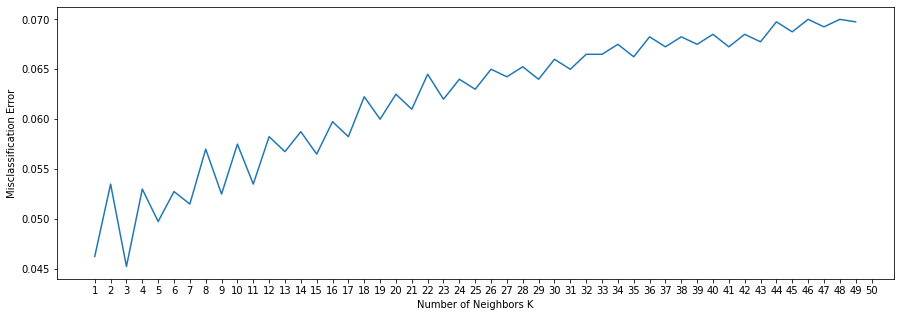

In [18]:
# changing to misclassification error
MCE = [1 - x for x in cv_scores]                        

# determining best k
optimal_k = myList[MCE.index(min(MCE))]
print("The optimal number of neighbors is %d" % optimal_k)

# plot misclassification error vs k
plt.figure(figsize=(15,5))
plt.plot(myList, MCE)
plt.xticks(np.arange(1, 51, 1))
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

### Method-2: GridSearch Cross validation

The best way to think about hyperparameters is like the settings of an algorithm that can be adjusted to optimize performance. 

While model parameters are learned during training — such as the slope and intercept in a linear regression — hyperparameters must be set by the data scientist before training

<img src="HyperParameterVsParameter.png">

### K-fold Cross Validation

<img src='K-fold.png'>

In [19]:
parameters = {'n_neighbors':list(range(3,15))}
clf = GridSearchCV(KNeighborsClassifier(algorithm = 'brute',n_neighbors=5,metric="euclidean",n_jobs=-1),
                   parameters, n_jobs=2,verbose=1, cv=5)
clf.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    7.9s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:    9.5s finished


GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(algorithm='brute',
                                            metric='euclidean', n_jobs=-1),
             n_jobs=2,
             param_grid={'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14]},
             verbose=1)

In [20]:
knn_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

0.9525 {'n_neighbors': 3}


In [21]:
y_pred_test=knn_model.predict(X_test)

In [22]:
print(confusion_matrix(y_test, y_pred_test))

[[890   8]
 [ 40  62]]


In [23]:
print(accuracy_score(y_test,y_pred_test))

0.952
